In [ ]:
# k-means clustering 

# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Allows charts to appear in the notebook
%matplotlib inline

In [ ]:
# Importing the dataset
dataset = pd.read_csv('cars (dataset for k means).csv')

In [ ]:
X = dataset[dataset.columns[:-1]]
X = X._convert(numeric=True)
X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [ ]:
# Eliminating null values

for i in X.columns:
  X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
  print(X[i].isnull().sum())

0
0
0
0
0
0
0


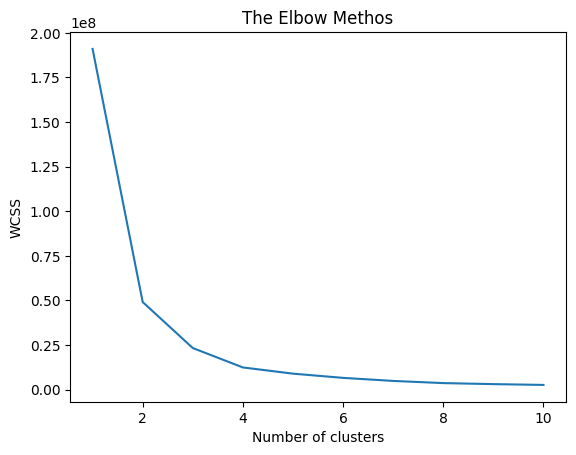

In [ ]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("The Elbow Methos")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# Applying k-means to the cars dataset

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

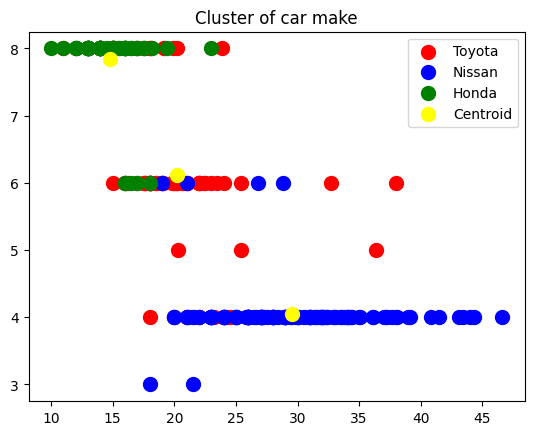

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Toyota')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Nissan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Honda')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroid')
plt.title("Cluster of car make")
plt.legend()